# Assignment 2 - Clustering
```
James Ambat
Assignment 2
CS-663
```

## My Setup
From the terminal, create and activate the virtual environment:
```
cd kmeans-jaambat
mkdir venv
python3 -m venv ./venv
source venv/bin/activate
```

I used PyCharm IDE for development and linked the interpreter with the following steps:
```
PyCharm -> Settings -> Project: kmeans-jaambat
Python Interpretter -> Add Interpretter
Add Local Interpretter -> /kmeans-jaambat/venv
```

From the terminal, install the required libraries:
```
cd kmeans-jaambat
pip install -r requirements.txt
```

# Part 1 - Implement K-Means
Create a python-based implementation of the K-Means algorithm.
* See my implementation of KMeans in `KMeans.py` and `Part 1 Calculations`
  * My implementation selects random centroid points that are dispersed by at least `0.65 standard deviations` away from each other in all dimensions so that there point spaced too far apart.
  * I also implement optional params to narrow down a reasonable range of x and y coordinates so that points are not scattered too far away. For example if the domain of points is around +/- 10 in the x or y direction, it will not make sense to select random centroids in the 10,000's range.
  * The aforementioned design implementations ensured clusters could be generated for the selected amount of clusters as compared to `make_blobs()`.
* Before implementing Part 2, I tested my implementation to verify performance in `Part 1 Calculations` with a unit test of (4) points.
  * The test uses (4) 2-dimensional points and k centroids that are randomly initialized
  * Distances to centroids are iteratively calculated for a `max_iterations` number of times.
  * The points are plotted using `plot_clustered_instances()` method to visualize the clustering.


![](media/test-scatter-plot.png)

## Part 1 Calculations

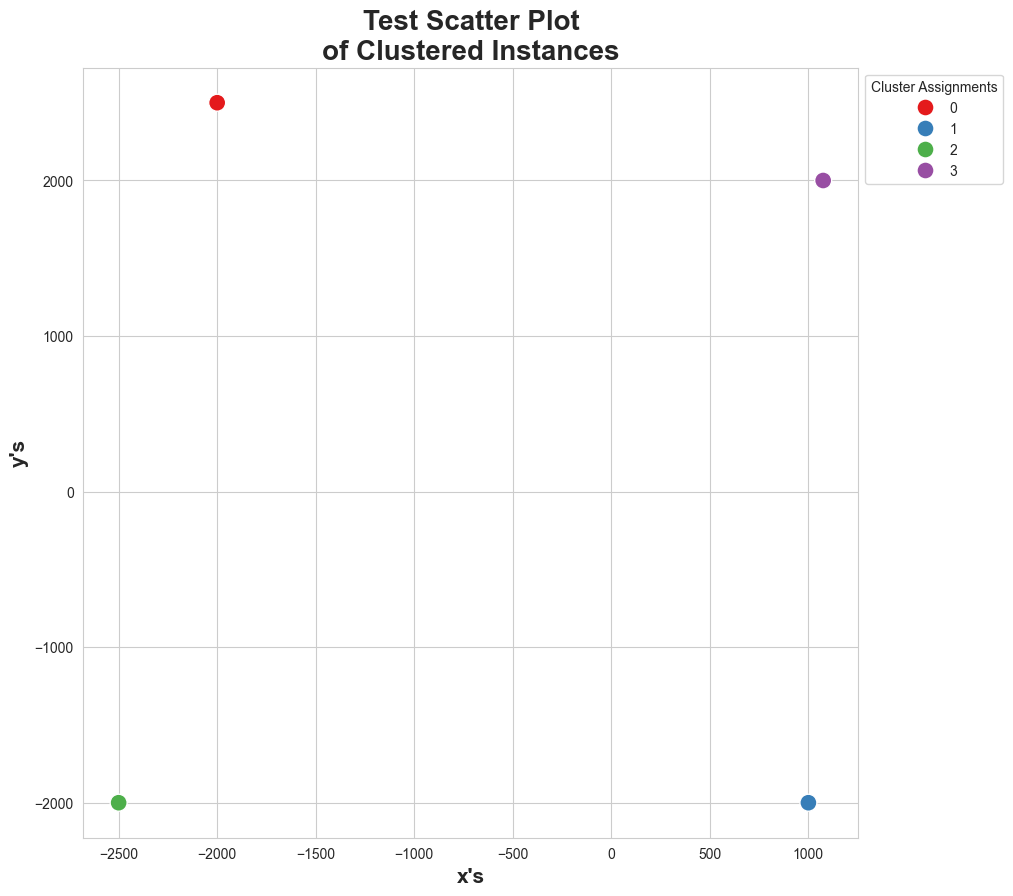

In [1]:
import math
import random
import time

import matplotlib.pyplot as plt
import numpy
import pandas as pd

# Part 1 - Implement K means
from KMeans import KMeans
k_means = KMeans(k=4, max_iterations=100)

# A list of test instances in 2-Dimensions
x_test = [[-2500, -2000], [-2000, 2500], [1000, -2000], [1075, 2000]]

# Test the implementations and plot the results.

# Since randomly selected centroids may produce a centroid that's too far away, perform a kmeans until a randomly selected set of
# centroids produces 4 clusters.
closest_centroids, centroid_coordinates = k_means.fit(x=x_test,
                                                      x_range=(-100, 100),
                                                      y_range=(-100, 100))

k_means.plot_clustered_instances(instances=x_test,
                                 closest_centroids=closest_centroids,
                                 scatter_plot_dot_size=150,
                                 scatter_plot_title="Test Scatter Plot\nof Clustered Instances",
                                 compare_against_make_blob=False,
                                 figure_file_name="./media/test-scatter-plot.png")

# Part 2 Performance Comparison
Do a performance comparison among expected labels using the implementation of K-Means and Scikit-Learn's library.
  2.1 - Use `x` as the parameter as input to the `fit()` function from **KMeans**, and use `cluster_assignments` to determine whether your implementation’s hypotheses are correct.
  2.2 - Use `x` as the parameter as input to KMeans as implemented in **scikit-learn**, and use `cluster_assignments` to determine whether that implementation’s hypotheses are correct.
  2.3 - Report two comparisons: one for your implementation’s hypotheses against the expected values in cluster_assignments; another for your implementation’s hypotheses against the hypotheses generated by scikit-learn.

## Part 2.1
When comparing my implementation's hypotheses, to the `make_blob` cluster assignment's the hypotheses appear to be correct.
* However, sometimes the randomly selected points may be placed **too close together** or **too far way** just by chance. And this behavior will create a tendency for centroids to become irrelevant and points will create groupings that differ from the `make_blob()`'s cluster assignments.
* To manage help this behavior, I made sure that randomly-selected centroids were evenly dispersed and that reasonable ranges for x's and y's could be specified as params so that ranges of starting points + a good dispersion of random points could cast initialize centroids with minimal side-effects.

![](media/kmeans-fit-vs-make-blob.png)

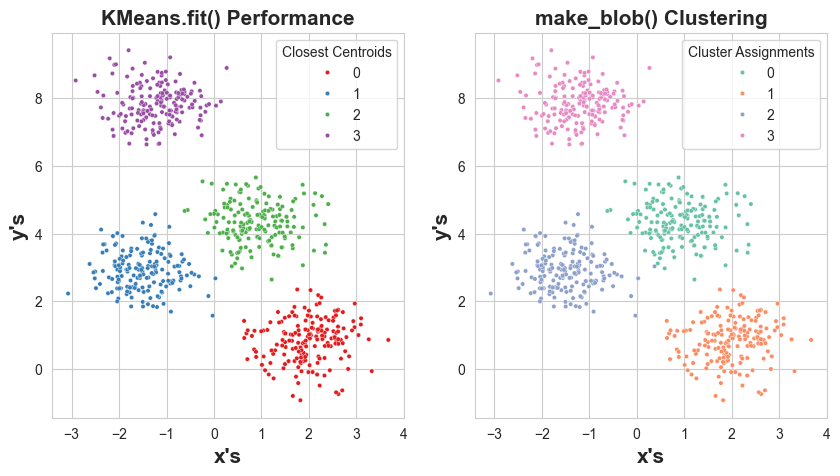

In [9]:
# Part 2.1 Calculations
from sklearn.datasets import make_blobs

# Generate instances of data points in 2D space.
x, cluster_assignments = make_blobs(n_samples=700, centers=4, cluster_std=0.60, random_state=0)

# Use implementation of KMeans.fit()
k_means = KMeans(k=4, max_iterations=200)
closest_centroids, _ = k_means.fit(x=x, x_range=(-3, 3), y_range=(-1, 8))

k_means.plot_clustered_instances(instances=x,
                                 closest_centroids=closest_centroids,
                                 scatter_plot_dot_size=10,
                                 scatter_plot_title="My K-Means Performance",
                                 compare_against_make_blob=True,
                                 make_blobs_cluster_assignments=cluster_assignments,
                                 figure_file_name="./media/kmeans-fit-vs-make-blob.png")


## Part 2.2
When using **scikit-learn's** implementation, its hypotheses as compared to `make_blob()'s` cluster_assignments appears to be a little different from `make_blob()'s` clustering assignments.
* The **scikit-learn** Kmeans implementation bisects two of the middle clusters into separate groupings in a horizontal manner.
* My implementation of the `KMeans.fit()` and the `make_blob()` cluster grouping seem to cluster the groups consistently between each other.
![](media/scikit-learn-vs-make-blob.png)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


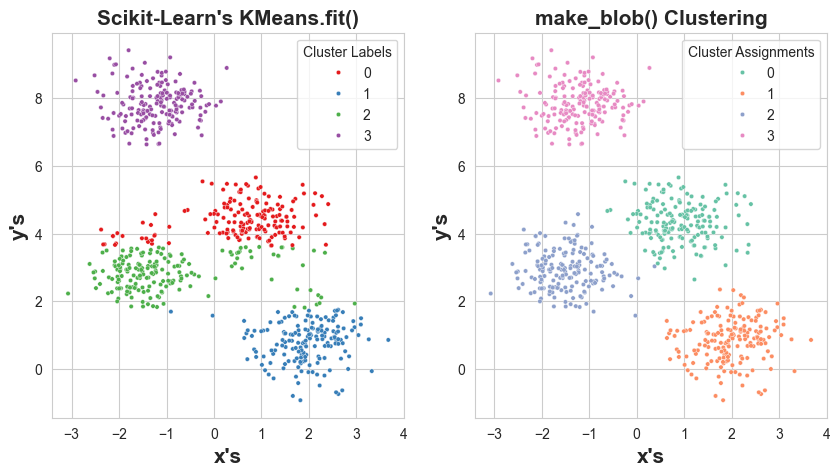

In [11]:
# Part 2.2 Calculations
from sklearn.cluster import KMeans
import seaborn as sns

k_means = KMeans(n_clusters=4, max_iter=200, tol=0.0001)

x_data_frame = pd.DataFrame(x)
x_data_frame.columns =["x", "y"]
k_means.fit(X=x_data_frame.iloc[:,1:])

# Get the labels of the cluster assignment from scikit-learn's Kmeans
cluster_labels = k_means.labels_

# Put the labels into the x_data_frame
x_data_frame["Cluster Labels"] = cluster_labels

# Plot the x_data_frame alongside the make_blob()'s cluster assignment
figures, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot the x_data_frame on the first axis
sns.scatterplot(data=x_data_frame, x="x", y="y", s=10, hue="Cluster Labels", palette="Set1", ax=axes[0])
axes[0].set_title("Scikit-Learn's KMeans.fit()", fontweight="bold", fontsize=15)
axes[0].set_xlabel("x's", fontweight="bold", fontsize=15)
axes[0].set_ylabel("y's", fontweight="bold", fontsize=15)
plt.legend(title="Cluster Labels")

# Plot the make_blob's cluster assignments in axis 2
if type(cluster_assignments) is numpy.ndarray:
    cluster_assignments = cluster_assignments.tolist()

x_data_frame["make_blob() Cluster Assignments"] = cluster_assignments
sns.scatterplot(data=x_data_frame, x="x", y="y", s=10, hue="make_blob() Cluster Assignments", palette="Set2", ax=axes[1])
axes[1].set_title("make_blob() Clustering", fontweight="bold", fontsize=15)
axes[1].set_xlabel("x's", fontweight="bold", fontsize=15)
axes[1].set_ylabel("y's", fontweight="bold", fontsize=15)
plt.legend(title="Cluster Assignments")

plt.savefig("./media/scikit-learn-vs-make-blob.png")
plt.show()

## Part 2.3
See the reported findings and scatter plots in `Part 2.1` and `Part 2.2`.

# Part 3 Choose and run clustering algorithms
Execute one or more clustering algorithms as implemented in scikit-learn (k-means, DBSCAN, Hierarchical) against the `Chicago Taxi Data` and `Mopsi Data Subset`
1. The reason why you chose the clustering algorithm(s)
2. Any pre-processing of the data or any hyperparameter settings
3. Output from the algorithm(s) -- show what clusters were generated
4. The metrics you used to evaluate the output. What kind of performance did you get from
that algorithm? Is that what you expected?

## 3.1 Chicago Taxi Data
Due to the size of the data (40MB), you may restrict clustering to using only the location data — pickup or drop off location coordinates.

### Before Clustering
* **Before clustering**, I analyze the data by plotting the coordinates to get a better understanding of what can actually be clustered.
* I noticed that some of the coordinates (lat, long) are spaced closely together. But their occurrences are not mapped to the same location since their latitudes and longitudes are too precise; precision to (6) decimal places.
* In order to get a better idea of how many pickup locations are in the same `General Location` I create new columns of Rounded Latitudes and Longitudes to be representative of a certain general location.
  * I then create a `General Location` column that is made of the rounded (Longitude / Latitude).
  * The `General Locations` are aggregated to form a new column where each row identifies the occurrence of each unique `General Location`.
  * Below is the Scatter Plot of Coordinates that show the concentration of general locations for pickups.

![](media/taxi-data-coordinates.png)


### Responses for 3.1 Chicago Data
* Also see Chicago Taxi Data Calculations.

#### 1. The reason why you chose the clustering algorithm(s)
* After inspecting the scatter plot and considering of the problem statement to use `Pick up or drop off location`, I decided to analyze the pickup coordinates by using the latitude and longitude.
* I chose to use **Hierarchical Clustering** since the there is great utility in understanding the value of the geographic locations from a business outlook.
* A taxi service can use this data to plan routes and dispatch drivers around highly requested and high-fare pickup locations.
* Drivers can also balance this against time traveled. Additionally, traveled time is a reasonable indicator of more business since more time spent driving is generally work expended on behalf of the taxi service.
* With this in mind, I found it useful to cluster for grouping of:
  * General Location
  * Occurrence
  * Trip Total
  * Trip Seconds
* Kmeans clustering is **not useful** in this application because the clusters are not spherical.
* And while DBSCAN can be used to cluster points with non-circular patterns, utility of clustering the locations is limited as we just acquire cluster assignments per region and not really learning anything about the data itself.

#### 2. Any pre-processing of the data or any hyperparameter settings
* Before running the dendrogram, I dropped all rows for na's on the latitudes and longitudes rows.
  * I do this because even if there was data for these coordinates, interpolating coordinates that were `never reported` does not add additional quality to the data analysis.
* From the pre-clustering assessment, I also dropped unnecessary columns and only used the following features in the dendrogram:
  * General Locations
  * Occurrence
  * Trip Total
  * Trip Seconds
* In order to use the general locations, I made the `General Locations` into strings encoded the data so that I could encode them for use in the dendrogram.
* I then aggregate the `Occurrences, Trip Totals, and Trip Seconds` by summing their totals and grouping them by the `General Locations`.
* Afterward, since we are using (3) difference features for clustering, I **normalize** the aggregated occurrences, trip totals, and trip seconds using **StandardScaler**.
* Since all the grouping have been performed, I take only the unique locations and drop the rest of the columns.
* I save the tupled `General Locations` for labeling.
* I then Label encode the locations so that we can use a proper data frame for the Dendrogram generation.
* I then insert the following features into the Dendrogram function and use the **complete** distance for the Hierarchical Linkage types to generate the clusters in order to have the largest dissimilarities cluster instances into groupings.
  * Encoded General Location
  * Normalized Trip Totals
  * Normalized Trip Seconds
  * Normalized Occurrence

#### 3. Output from the algorithm(s) -- show what clusters were generate
* My dendrogram implementation is below:

![](media/taxi-data-dendrogram.png)

#### 4. The metrics you used to evaluate the output. What kind of performance did you get from that algorithm? Is that what you expected?
* To evaluate this output, I see that from at the very bottom of the tree, each `General Location` is clustered into its own grouping.
* I then "zoom out" a little and move up the tree to see clusters of grouping at a higher level up the tree.
  * Here, I see there are 10 clusters, one for each branch at this point in the tree.

![](media/clusters-dengrogram.png)

* I perform a quality spot check on the clustering to verify the performance by inspecting if I can identify the **highly concentrated** occurrences that were plotted before clustering was performed. While these datapoints are now normalized and also include Trip Total and Trip Time in the distancing calculations, it is a good indicator to verify the performance.
  * When inspecting the map, I can see that the Dendrogram is clustering consistently with the high concentration areas (+ I recognize it is also calculating the Normalized Trip Totals and Trip Seconds into the cluster distances).

![](media/cluster-1.png)

#### Additionally, I inspect the Chicago geography to verify the locations and see if their locations are consistent with high traffic, high fare, trip time locations.
* When inspecting a `Google Map` of Chicago, I was able to see that the high fare /  high traffic /areas are the **O`Hare International Airport** and the **Downtown** areas.
* These two areas are consistent with high traffic, high fare, larger trip times.
![](media/Chicago.png)

* And these results are what I was expecting.

## 3.1 Chicago Taxi Data Calculations

In [2]:
# Chicago Taxi Data Calculations
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Before clustering, get an idea of the coordinates.
taxi_data_frame = pd.read_csv("./data/Taxi_Trips__2013-2023_.csv", header="infer")

# Inspect information to get a preview of the data's makeup
print("-------------------------------------------------\n"
      "Taxi Data Information                            \n"
      "-------------------------------------------------")
taxi_data_frame.info()

-------------------------------------------------
Taxi Data Information                            
-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101788 entries, 0 to 101787
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Trip ID                     101788 non-null  object 
 1   Taxi ID                     101779 non-null  object 
 2   Trip Start Timestamp        101788 non-null  object 
 3   Trip End Timestamp          101788 non-null  object 
 4   Trip Seconds                101763 non-null  float64
 5   Trip Miles                  101788 non-null  float64
 6   Pickup Census Tract         35179 non-null   float64
 7   Dropoff Census Tract        35054 non-null   float64
 8   Pickup Community Area       95650 non-null   float64
 9   Dropoff Community Area      92192 non-null   float64
 10  Fare                        101681 non

-------------------------------------------------
Taxi Data Rounded Latitudes and Longitudes       
-------------------------------------------------
   Pickup Centroid Latitude  Pickup Centroid Longitude  Trip Total  \
0                 41.980264                 -87.913625       49.75   
1                 41.878866                 -87.625192       13.00   
2                 41.899602                 -87.633308        9.75   

   Trip Seconds  Rounded Pickup Latitude  Rounded Pickup Longitude  
0        1140.0                    41.98                    -87.91  
1         660.0                    41.88                    -87.63  
2         480.0                    41.90                    -87.63  
-------------------------------------------------
General Location Occurrences                     
-------------------------------------------------
   Pickup Centroid Latitude  Pickup Centroid Longitude  Trip Total  \
0                 41.980264                 -87.913625       49.75   
1  

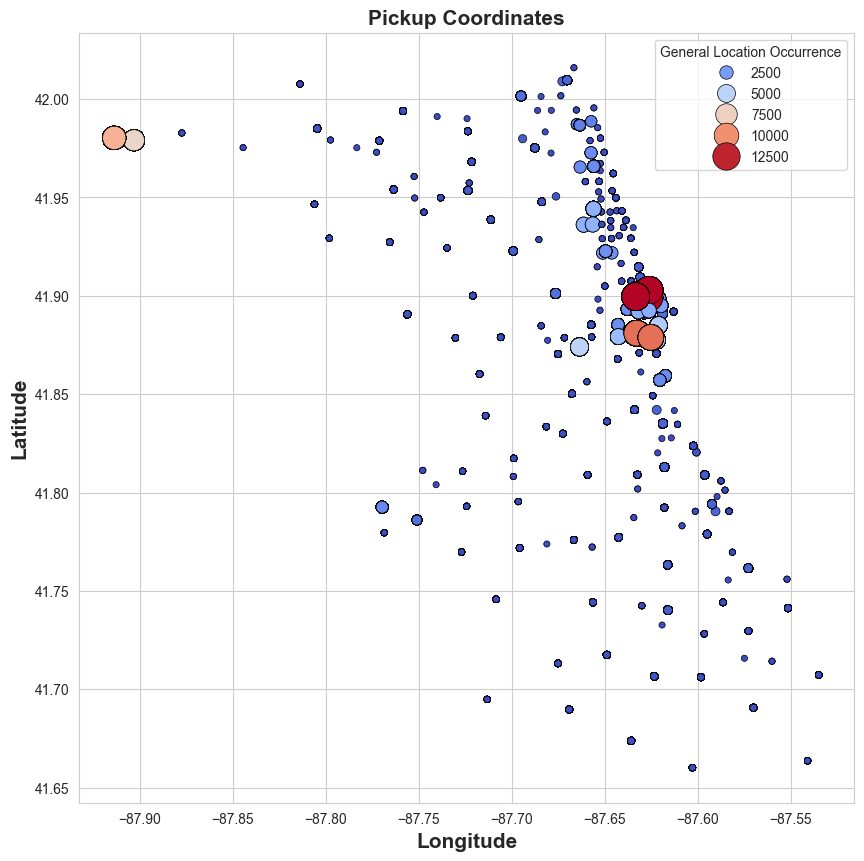

In [3]:
# After inspecting and considering the usage of the problem statement to use pick up or drop off location,
# I elect to analyze the pickup coordinates by using the latitude and longitude.
taxi_data_frame = taxi_data_frame[
    [
        "Pickup Centroid Latitude",
        "Pickup Centroid Longitude",
        "Trip Total",
        "Trip Seconds"
    ]
]

taxi_data_frame.head(5)

# I also notice the datapoints have very fine-grained precision.
# In order to get an idea of how "dense" these are within a general location, I round coordinates to
# nearest 3 decimal places and then aggregate counts on groupings of data within the same "general location"
precision = 2
taxi_data_frame["Rounded Pickup Latitude"] = round(taxi_data_frame["Pickup Centroid Latitude"], precision)
taxi_data_frame["Rounded Pickup Longitude"] = round(taxi_data_frame["Pickup Centroid Longitude"], precision)
print("-------------------------------------------------\n"
      "Taxi Data Rounded Latitudes and Longitudes       \n"
      "-------------------------------------------------")
print(taxi_data_frame.head(3))

# Identify a location as a combination of Latitude and Longitude
taxi_data_frame["General Location"] = list(zip(
    taxi_data_frame["Rounded Pickup Longitude"], taxi_data_frame["Rounded Pickup Latitude"]))

# Acquire occurrences of these general locations.
taxi_data_frame["General Location Occurrence"] = \
    taxi_data_frame.groupby("General Location")["General Location"].transform("size")

print("-------------------------------------------------\n"
      "General Location Occurrences                     \n"
      "-------------------------------------------------")
print(taxi_data_frame.head(3))

# Plot the actual coordinates while referencing the occurrences of general locations as a "density" indicator
figure, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
axes.set_title("Pickup Coordinates", fontweight="bold", fontsize=15)
axes.set_xlabel("Longitude", fontweight="bold", fontsize=15)
axes.set_ylabel("Latitude", fontweight="bold", fontsize=15)

sns.scatterplot(data=taxi_data_frame,
                x="Pickup Centroid Longitude",
                y="Pickup Centroid Latitude",
                hue="General Location Occurrence",
                size="General Location Occurrence",
                sizes=(20, 400),
                palette="coolwarm",
                edgecolor="black",
                linewidth=0.5)

axes.figure.savefig("./media/taxi-data-coordinates.png")
plt.show()

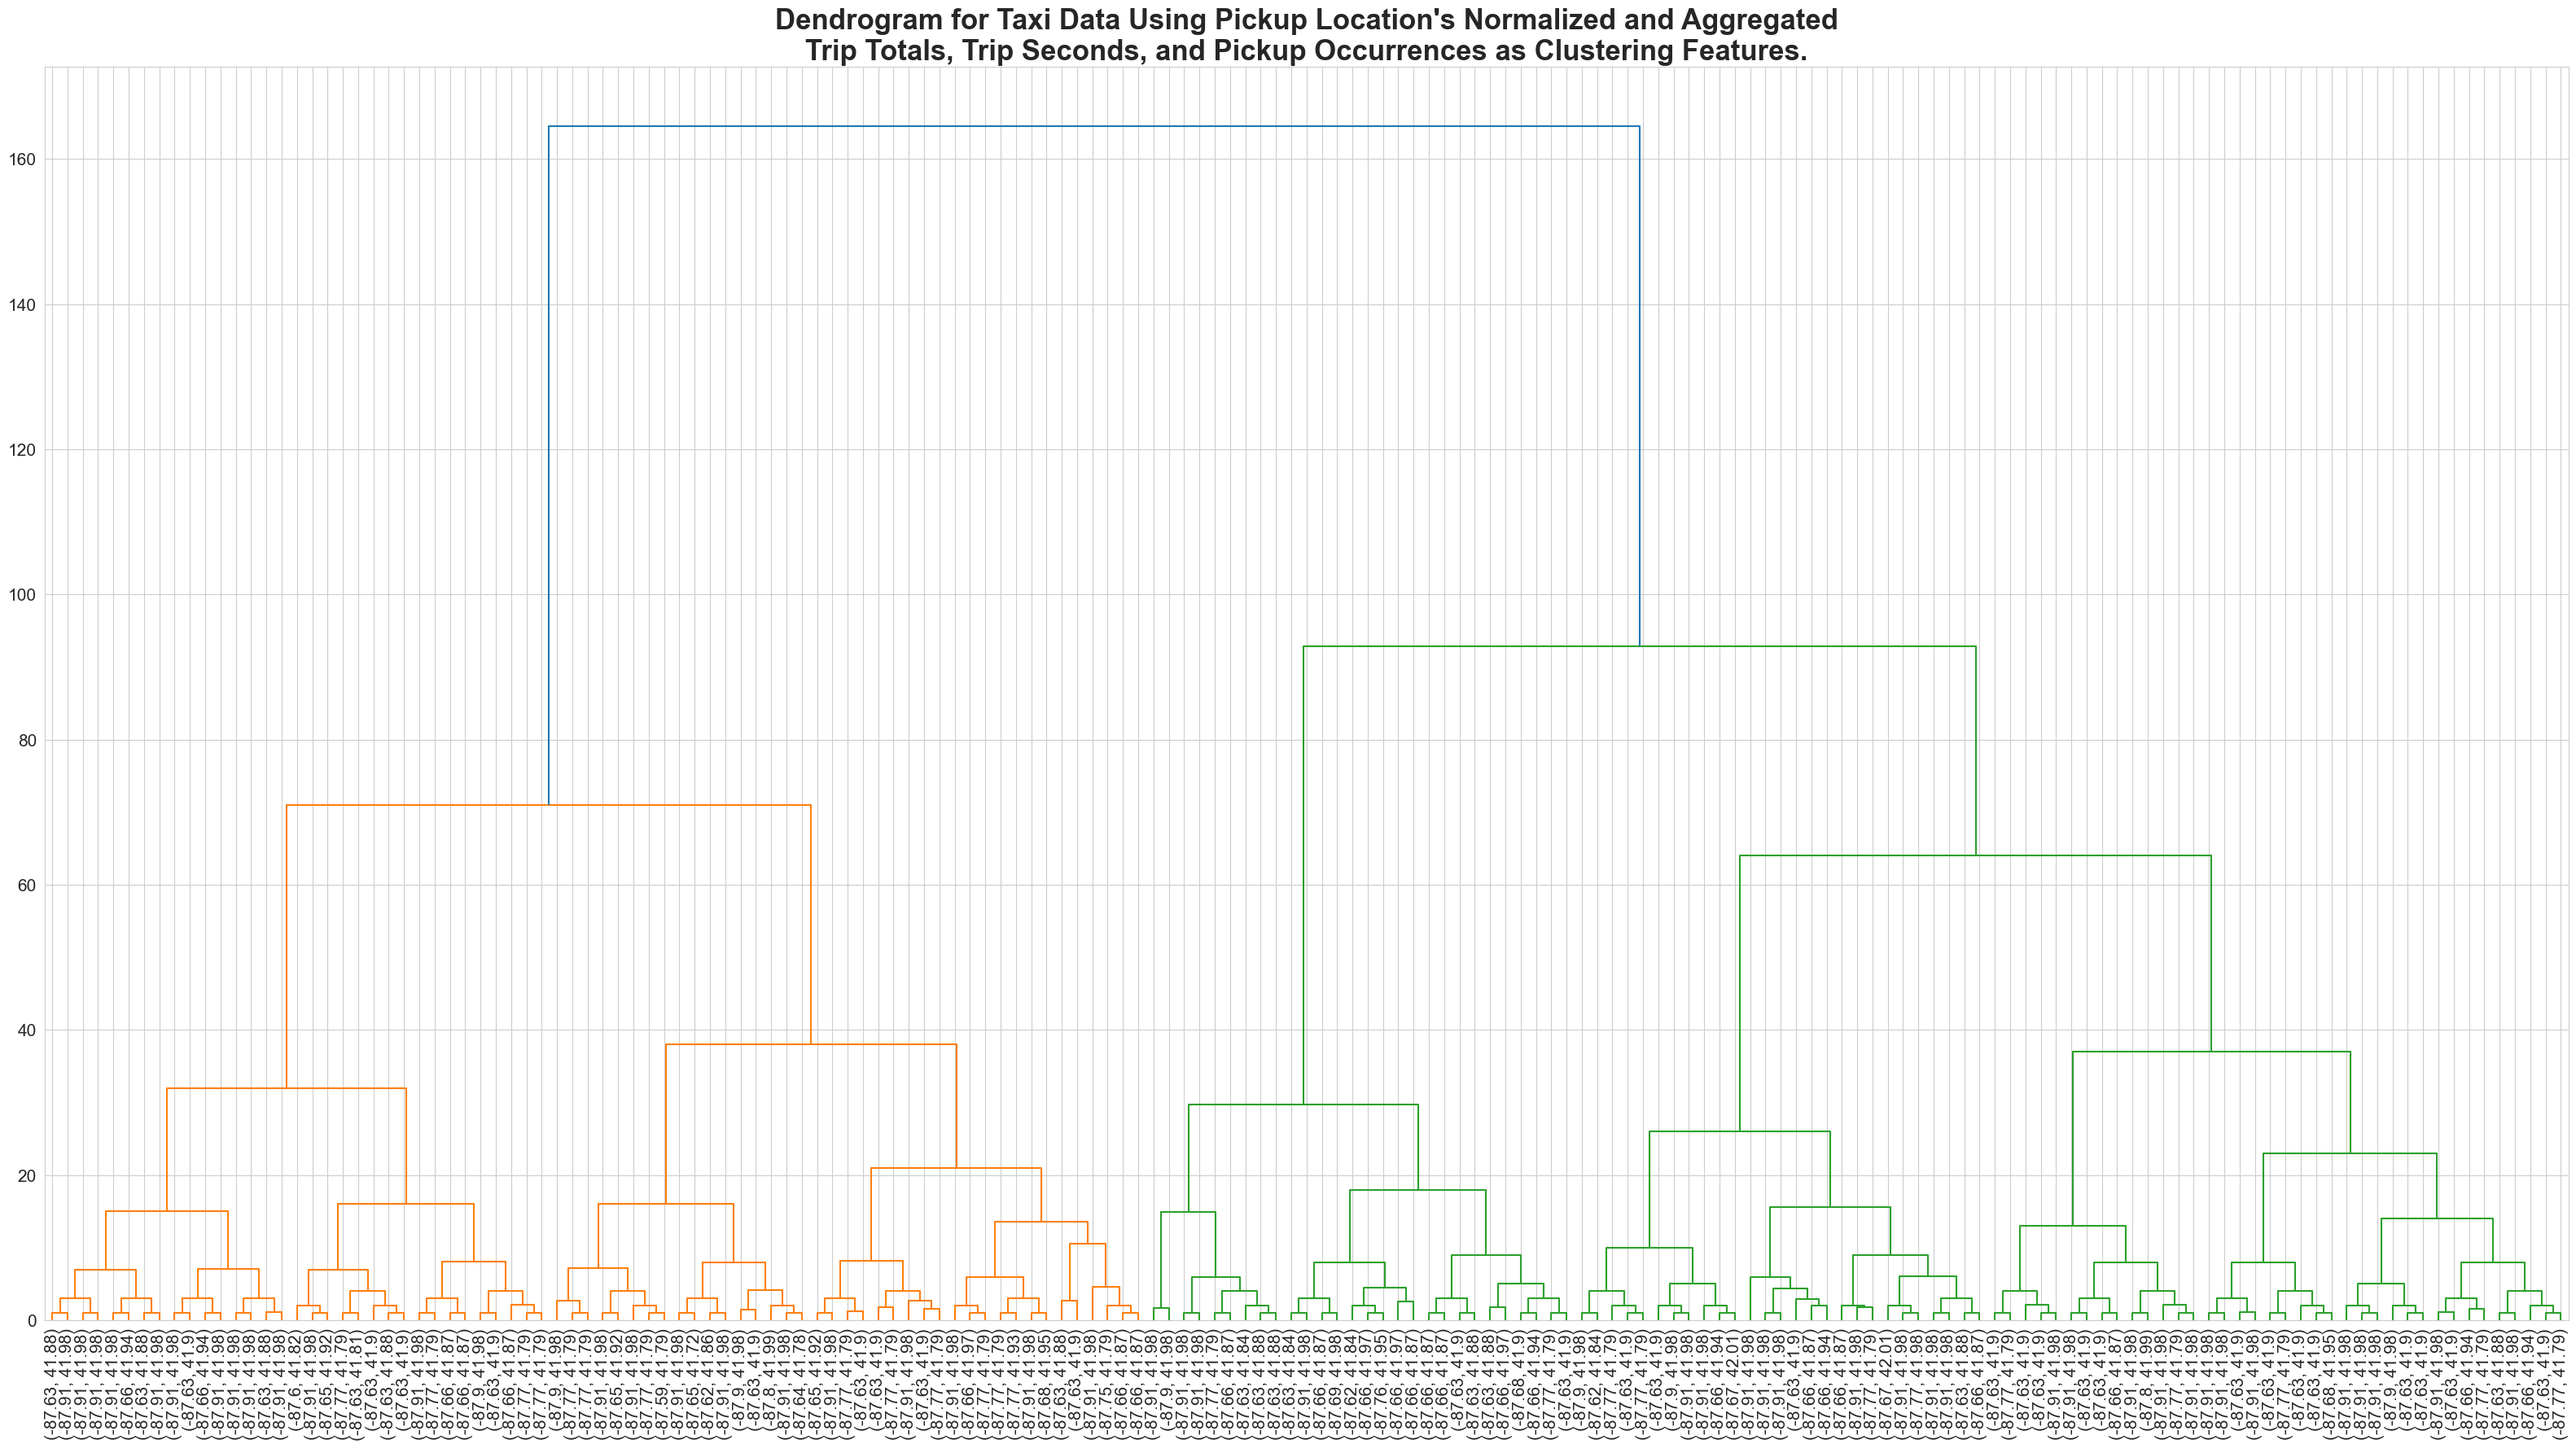

In [4]:
# Dendrogram Calculations
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import LabelEncoder, StandardScaler

taxi_data_frame = taxi_data_frame.dropna()
label_encoder = LabelEncoder()
general_locations = taxi_data_frame["General Location"].values
general_locations = [str(item) for item in general_locations]
label_encoder.fit(general_locations)

# Put into N x 1 array for encoding
encoded_locations = label_encoder.transform(general_locations)

# Add the total encoded locations
taxi_data_frame["Encoded General Location"] = encoded_locations

# Aggregate the Trip Totals and Trip Seconds for each General Location so that it can be used in clustering
taxi_data_frame["Trip Total Sum by General Location"] = \
    taxi_data_frame.groupby("Encoded General Location")["Trip Total"].transform("sum")

taxi_data_frame["Trip Seconds Sum by General Location"] = \
    taxi_data_frame.groupby("Encoded General Location")["Trip Seconds"].transform("sum")

# At this point, I have aggregate the sums of Trip Total, Trip Seconds, and Occurrence by location.
# I drop the duplicate name, reducing the dataset down the aggregations across the row for making a dendrogram.
taxi_data_frame_dendrogram = taxi_data_frame[
    [
    "Encoded General Location",
    "Trip Total Sum by General Location",
    "Trip Seconds Sum by General Location",
    "General Location Occurrence",
    "General Location"  # This will be deleted after acquiring it for labeling.
    ]
]

taxi_data_frame_dendrogram = taxi_data_frame_dendrogram.drop_duplicates(subset="General Location")
labels_data_frame = taxi_data_frame_dendrogram["General Location"]
taxi_data_frame_dendrogram.drop("General Location", axis=1)

# Normalize the aggregate Trip Totals, Trip Seconds, and Occurrences since we compare across features
standardScaler = StandardScaler()
taxi_data_frame_dendrogram["Normalized Trip Totals"] = standardScaler.fit_transform(
   taxi_data_frame_dendrogram[["Trip Total Sum by General Location"]],
)

taxi_data_frame_dendrogram["Normalized Trip Seconds"] = standardScaler.fit_transform(
   taxi_data_frame_dendrogram[["Trip Seconds Sum by General Location"]],
)

taxi_data_frame_dendrogram["Normalized Occurrence"] = standardScaler.fit_transform(
   taxi_data_frame_dendrogram[["General Location Occurrence"]],
)


def get_leaf_labels(index: int):
    """
    Column index 6 is the General Location in taxi_data_frame. taxi_data_frame_dendrogram only has the encoded locations.
    """
    return taxi_data_frame.iloc[index, 6]

plt.figure(figsize=(40, 20))
plt.title("Dendrogram for Taxi Data Using Pickup Location's Normalized and Aggregated\n"
          "Trip Totals, Trip Seconds, and Pickup Occurrences as Clustering Features.", fontweight="bold", fontsize=25)

dendrogram = dendrogram(
    linkage(taxi_data_frame_dendrogram[[
        "Encoded General Location",
        "Normalized Trip Totals",
        "Normalized Trip Seconds",
        "Normalized Occurrence"
    ]],
    method="complete"),
    leaf_label_func=get_leaf_labels)

plt.savefig("./media/taxi-data-dendrogram.png", dpi=700)
plt.tick_params(labelsize=15)
plt.show()

## 3.1 Mopsi Data

### Before Clustering
* **Before clustering**, I analyze the data by plotting the two features to get a better understanding of what can actually be clustered.
* I notice that these two features are likely `x` and `y` coordinates. And these coordinates look to be plotting locations along specific routes.
  * Below is the Scatter Plot of Coordinates that show the concentration of general locations for pickups.
  * It seems like it is possible to use DBSCAN in order to cluster closely spaced datapoints and group them along the routes they might belong to.
  * After analyzing the data and recognizing that the data comes from Finland, I **later** invert the x and the y axes since I noticed the geography might be backwards.
  * See Subsection 2.

![](media/explore-mopsi-scatter-plot.png)


#### 1. The reason why you chose the clustering algorithm(s)
I selected DBSCAN for clustering for a few reasons:
* The scatter plot shows that there aren't any circular patters; therefore K-Means is not really suitable.
* The data also only has two features which appear to be x and y coordinates; therefore hierarchical clustering is not really suitable since we only have data associated with coordinates.
* DBSCAN can be used to cluster concentrations and groupings of the data based on proximity / dense of these coordinates.
#### 2. Any pre-processing of the data or any hyperparameter settings
* When using DBSCAN, hyperparameters `epsilon` and `min_samples` are needed to:
  * Determine the max distance between two samples for membership in the cluster to occur.
    * In order to acquire a reasonable estimate of this parameter, I randomly sample 50 points of all the coordinates and calculate distances to all the other points in the graph.
    * I then collect all these distances and acquire a histogram and information. Below a description of the distribution of the distances. When inspecting the distribution, we see that it is not a normal distribution, and we should use the **median** vs. the mean to estimate an epsilon. The median here is 4917, and I round to 5000 for epsilon.
```
---------------------------------------------------------
Description of the distances
---------------------------------------------------------
           distances
count  673300.000000
mean    18013.158741
std     23826.715440
min         0.000000
25%       673.594834
50%      4917.697937
75%     34595.761285
max    105727.679559
```

* Using this I generate clustered assignments with `DBSCAN` using `epsilon=5000` and `min_samples=20` for membership into a cluster.
#### 3. Output from the algorithm(s) -- show what clusters were generated
The generated clusters from DBSCAN are as follows:
* There are `17` clusters where the clusters in `red` and indicated as `-1` are considered **noise.**

![](media/mopsi-dbscan.png)

* I then remove the `noise` and **invert the x's and y's** since I notice that the Finland geography should be consistent with the coordinates.
* Below is the inverted map with the noise removed. I plotted the coordinates in another color palette so that the red dots were not showing as `Cluster Assignment 0`.
![](media/mopsi-dbscan-no-noise-inverted.png)

#### 4. The metrics you used to evaluate the output. What kind of performance did you get from that algorithm? Is that what you expected?
In order to evaluate my algorithm, I looked up map of Finland on `Google Maps`. Below is the map that was acquired from Google Maps.

![](media/map.png)

#### I make the following comparisons my looking up a few dense cities to map to a few of the clustered centroids.
![](media/comparison.png)

* The clustering hypotheses appear to be accurate using this metric.
* And by inspecting the geography, and recognizing that Finland's geography, it was neccessary to invert the coordinates.
* The clustering appears to be as expected.

# 3.1 Calculations

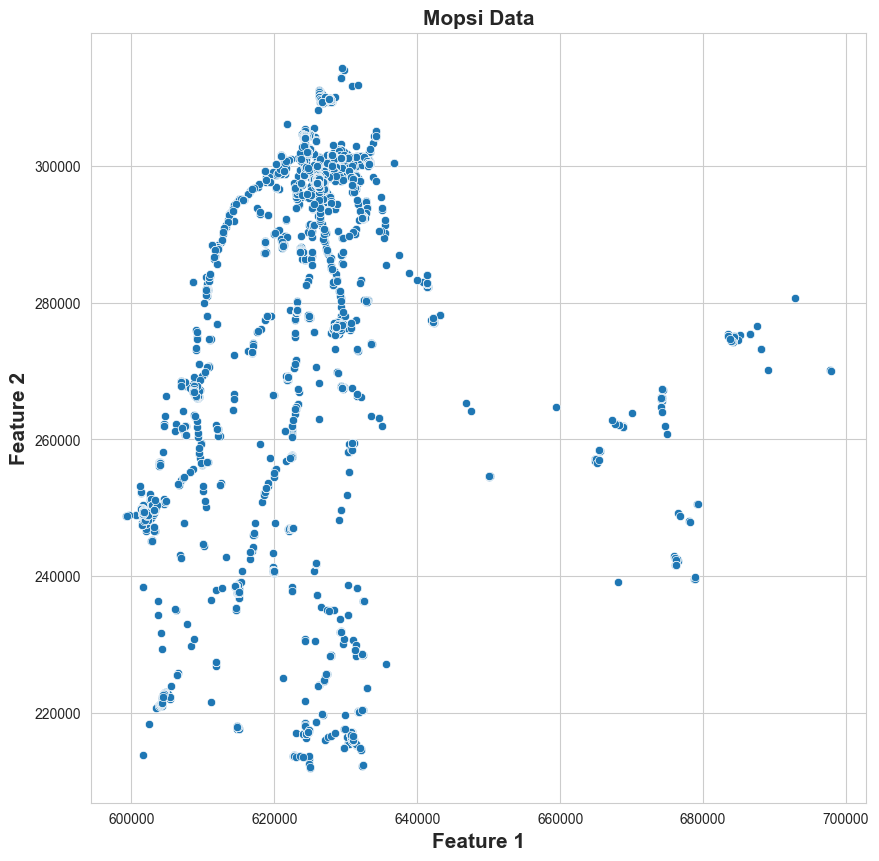

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

mopsi_data_frame = pd.read_csv("./data/MopsiLocationsUntil2012-Finland.txt", sep="\t", header=None)

mopsi_data_frame.columns = ["feature_1", "feature_2"]

figure, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
axes.set_title("Mopsi Data", fontweight="bold", fontsize=15)
axes.set_xlabel("Feature 1", fontweight="bold", fontsize=15)
axes.set_ylabel("Feature 2", fontweight="bold", fontsize=15)

sns.scatterplot(data=mopsi_data_frame,
                x="feature_1",
                y="feature_2")

plt.savefig("./media/explore-mopsi-scatter-plot.png")
plt.show()

In [3]:
# DBSCAN Implementation
# To implement DB scan we need an epsilon which is the max distance between two points for consideration
# to be a part of a cluster. To get an idea of how close the points can be to each other, I take the
# first point, and calculate the distance to all the other points. And using this array of distances, to
# all other points.

# Start off by randomly sampling 50 points and find the distances between those 50 points and all
# other points. It is too expensive to loop through all points to get the distance to all other points.

import random
import time
import math
import pandas as pd
random.seed(time.time_ns())
num_coordinates = mopsi_data_frame.shape[0]
rand_indexes = [random.randint(0, num_coordinates) for _ in range(50)]

distances = []
for index in rand_indexes:
    x1 = mopsi_data_frame["feature_1"].iloc[index]
    y1 = mopsi_data_frame["feature_2"].iloc[index]

    for j in range(num_coordinates):
        if index != j:
            x2 = mopsi_data_frame["feature_1"].iloc[j]
            y2 = mopsi_data_frame["feature_2"].iloc[j]

            distance = math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
            distances.append(distance)

distances_data_frame = pd.DataFrame(distances, columns=["distances"])
print("---------------------------------------------------------\n"
      "Description of the distances                             \n"
      "---------------------------------------------------------")
print(distances_data_frame.describe())

---------------------------------------------------------
Description of the distances                             
---------------------------------------------------------
           distances
count  673300.000000
mean    18013.158741
std     23826.715440
min         0.000000
25%       673.594834
50%      4917.697937
75%     34595.761285
max    105727.679559


---------------------------------------------------------
Different Clusters from the DBSCAN (-1 is noise)         
---------------------------------------------------------
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


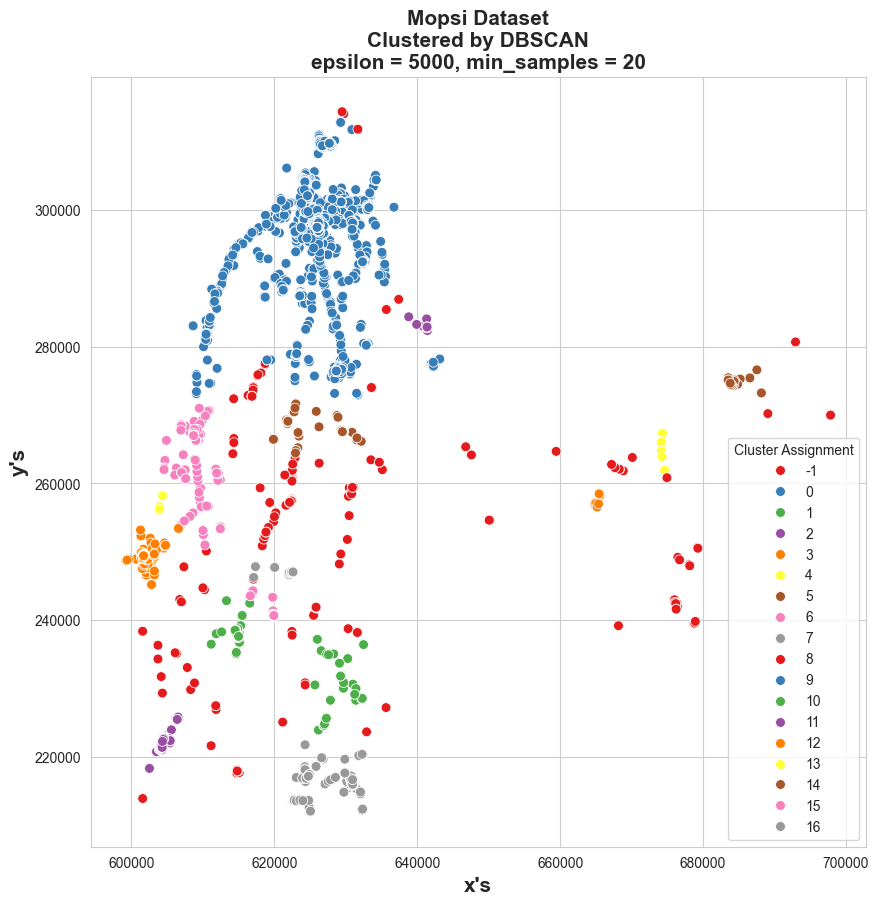

In [45]:
# When inspecting histogram of the data we see that it's not really normal for these samples,
# Therefore, we will use the median vs. the mean as our first step to setting to epsilon.
# I see that there is a distance of 1648 units at the 50 percentile. To start, I will round this up and
# use 2000 units as the epsilon.
from sklearn.cluster import DBSCAN
import seaborn as sns
import numpy as np

epsilon = 5000
min_samples = 20
db_scan = DBSCAN(eps=epsilon, min_samples=min_samples)
cluster_assignments = db_scan.fit_predict(mopsi_data_frame)
unique_clusters = np.unique(cluster_assignments)

print("---------------------------------------------------------\n"
      "Different Clusters from the DBSCAN (-1 is noise)         \n"
      "---------------------------------------------------------")
print(unique_clusters)

# Add these cluster assignments to the data frame
mopsi_data_frame["Cluster Assignment"] = cluster_assignments
mopsi_data_frame.head(3)

# Plot the clusters
figure, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
axes.set_title("Mopsi Dataset\n"
               "Clustered by DBSCAN\nepsilon = %d, min_samples = %d" % (epsilon, min_samples), fontweight="bold", fontsize=15)
axes.set_xlabel("x's", fontweight="bold", fontsize=15)
axes.set_ylabel("y's", fontweight="bold", fontsize=15)
sns.scatterplot(data=mopsi_data_frame,
                x="feature_1",
                y="feature_2",
                hue="Cluster Assignment",
                palette="Set1",
                s=50)

plt.savefig("./media/mopsi-dbscan.png")


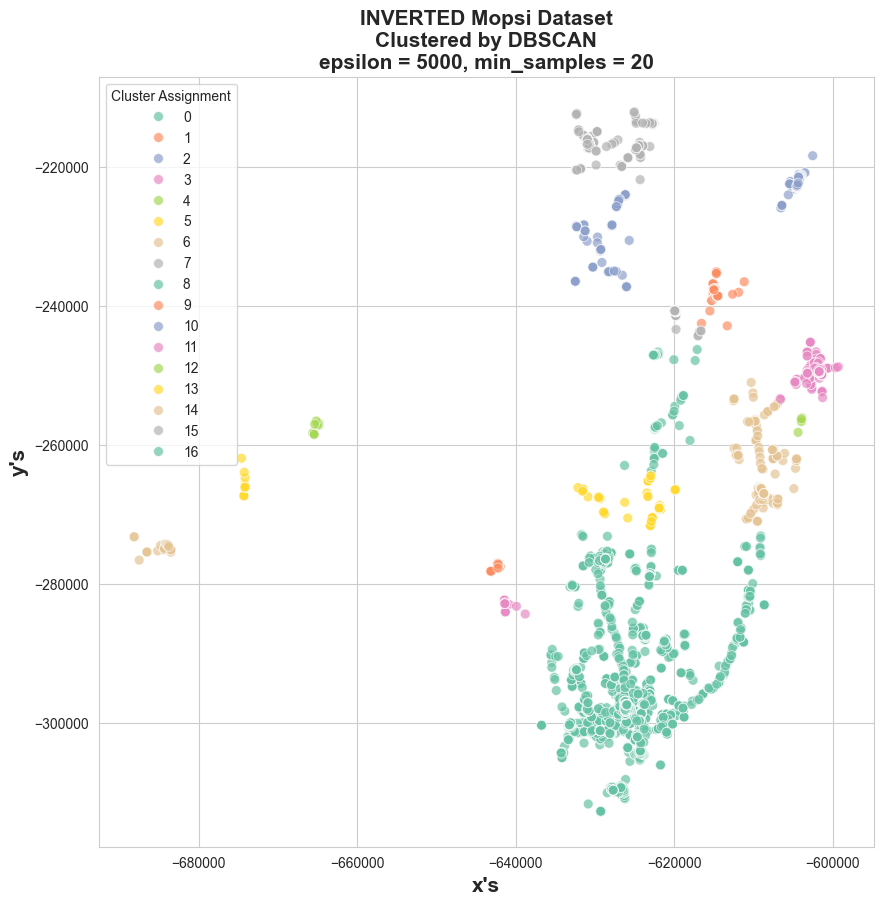

In [46]:
# Invert the y's and x's
mopsi_data_frame["Inverted feature_2"] = mopsi_data_frame["feature_2"] * -1
mopsi_data_frame["Inverted feature_1"] = mopsi_data_frame["feature_1"] * -1

figure, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
axes.set_title("INVERTED Mopsi Dataset\n"
               "Clustered by DBSCAN\nepsilon = %d, min_samples = %d" % (epsilon, min_samples), fontweight="bold", fontsize=15)
axes.set_xlabel("x's", fontweight="bold", fontsize=15)
axes.set_ylabel("y's", fontweight="bold", fontsize=15)
sns.scatterplot(data=mopsi_data_frame[mopsi_data_frame["Cluster Assignment"] != -1],
                x="Inverted feature_1",
                y="Inverted feature_2",
                hue="Cluster Assignment",
                palette="Set2",
                s=50,
                alpha=0.7)

plt.savefig("./media/mopsi-dbscan-no-noise-inverted.png")